# 인공지능
- 사람처럼 학습하고 추론할 수 있는 지능을 가진 시스테을 만드는 기술

# 머신러닝

- 규칙을 프로그래밍하지 않아도 자동으로 데이터에서 규칙을 학습하는 알고리즘을 연구하는 분야
- 통계학과 깊은 관련이 있으나 최근 머신러닝의 발전은 경험을 바탕으로 발전하는 경우도 많음

## 사이킷런
- 사이킷런 라이브러리에서 제공하는 클래스와 함수를 사용하여 필요한 작업 수행 가능
- 안정적이며 성능이 검증됨

# 딥러닝
- 인공신경망을 기반으로 한 방법들 통칭

# 생선 분류 문제
- 도미와 빙어 구분하기 <br>
- **이진분류** 이용하기
  - 두 개의 클래스 중 하나를 고르는 문제

## 관련 개념 정리

- 특성 : 데이터츷 표현하는 하나의 성질. 생선 데이터 각각의 길이와 무게가 특성
- 선형 : 그래프가 일직선에 가까운 형태를 나타내는 경우

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 도미  특성
# bream_length : 도미의 길이   bream_weight : 도미의 무게

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

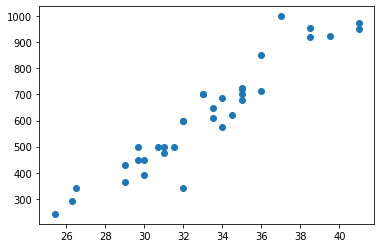

In [6]:
# 그래프가 선형적임

plt.scatter(x = bream_length, y = bream_weight)
plt.xlable = 'length'
plt.ylable = 'weight'
plt.show()

In [7]:
# 빙어 특성
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

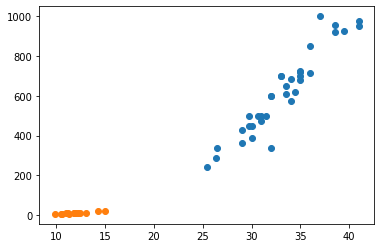

In [8]:
# 빙어의 산점도도 선형적이나 무게가 길이에 영향을 덜 받음

plt.scatter(x = bream_length, y = bream_weight)
plt.scatter(x = smelt_length, y = smelt_weight)

plt.xlable = 'length'
plt.ylable = 'weight'
plt.show()

# 데이터 합치기

In [9]:
# 두 개의 리스츠를 하나로 합침

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [10]:
# weight와 length 2차원 리스트로 만들어보기 

fish = [[l,w] for l,w in zip(length,weight)]
fish

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [11]:
# 정답 데이터 만들기 : 머신러닝에서는 정답값이 1, 아닌 것을 0으로 봄 
# 정답 데이터를 만드는 이유 : 예측에 관한 답이 있어야 정확하게 예측했는지를 알 수 있기 때문

fish_target = [1] * 35 + [0] * 14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## 최근접 이웃 알고리즘
- 주위의 다른 데이터를 통해 다수를 차지하는 것을 정답으로 사용 
- 데이터가 많을 땐 사용하기 어려운 모델임. 데이터가 크기 때문에 메모리가 많이 필요하고, 직선 거리를 계산하는 시간도 오래걸리기 때문
- 

## 관련 개념 정리
- 모델 : 알고리즘이 구현된 객체
- 훈련 : 모델에 데이터를 전달하여 규칙을 학습하는 과정
- 정확도 : 정확한 답을 얼마나 맞혔는지 백분율로 나타낸 값
  - 정확도 = (맞힌 개수) / (전체 데이터 수)

In [12]:
# 최근접 이웃 알고리즘

from sklearn.neighbors import KNeighborsClassifier

In [13]:
# KNeighborsClassifier의 객체 만들기

kn = KNeighborsClassifier()

In [14]:
# fish와 target data를 이용하여 도미를 찾기 위한 기준 학습

kn.fit(fish, fish_target) 

KNeighborsClassifier()

In [15]:
# 훈련 평가 = 정확도 계산(0~1 사이의 값)
# 정확도가 1.0 -> 정답을 정확히 맞춤

kn.score(fish, fish_target) 

1.0

In [16]:
# 모델 성능 확인해보기 (1 : 도미, 0 : 빙어)
# fish가 2차원이니까 predict() 매서드도 2차원으로
kn.predict([[10, 8.5]])

array([0])

최근접 이웃 모델은 기본으로 참고하는 데이터가 5개임. <br>
n_neighbors를 통해 참고 데이터를 늘렸을 때의 값 확인해보기

In [17]:
kn49 = KNeighborsClassifier(n_neighbors = 49)

In [18]:
# 도미가 35개, 빙어가 14개 있으므로 어떤 데이터를 넣어도 도미로 예측할 것임.

kn49.fit(fish, fish_target)
kn49.score(fish, fish_target) 

0.7142857142857143

In [19]:
# n_neighbors의 최적값 찾기

kn = KNeighborsClassifier()
kn.fit(fish, fish_target)

for n in range(5,50):
  kn.n_neighbors = n
  score = kn.score(fish, fish_target)

  if score < 1 :
    print(n, score)
    break

18 0.9795918367346939
